### **Digit Classification Problem - Overview**

#### Initial Impoting Statements

In [1]:
# Notebook Preamble
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import display, Latex
from sklearn import preprocessing as sklpp
from sklearn import decomposition as skldecomp

#### Loading Data

In [2]:
# Loading data for Digit Recognizer Problem
training_set = pd.read_csv("DigitRecognizer.csv", nrows=5000)
# Summary of Dataframe
print('Dimensions', training_set.shape) 
print(training_set.axes)

Dimensions (5000, 785)
[RangeIndex(start=0, stop=5000, step=1), Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)]


- The data file DigitRecognizer.csv contains gray-scale images of hand-drawn digits, from zero through nine.
- Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. 
- The data set has 785 columns and 42K images. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image. The analysis is performed on only the first 5000 samples.

In [3]:
N = 5000 
X = training_set.loc[:, 'pixel0':'pixel783']
Y = training_set.loc[:, 'label']

In [4]:
print('X - Dimensions:', X.shape, ', Type:', type(X))
print('Y- Dimensions:', Y.shape, ', Type:', type(Y))

X - Dimensions: (5000, 784) , Type: <class 'pandas.core.frame.DataFrame'>
Y- Dimensions: (5000,) , Type: <class 'pandas.core.series.Series'>


#### Displaying an Image and Label from the Dataset

<Figure size 432x288 with 0 Axes>

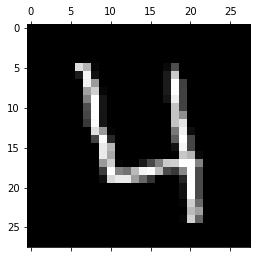

Lable for this image: 4


In [5]:
plt.gray()
plt.matshow(np.array(X.loc[3,:]).reshape((28,28)))
plt.show()
print('Lable for this image:', Y[3])

---

### **Digit Classification Problem - Preprocessing and Dimensionality Reduction**

#### Standardizing Data to zero mean

In [6]:
# Standardizing mean using StandardScaler() object
mean_datascaler = sklpp.StandardScaler(with_mean=True, with_std=False)
X_centered = mean_datascaler.fit_transform(X)
mean_vector = mean_datascaler.mean_

<Figure size 432x288 with 0 Axes>

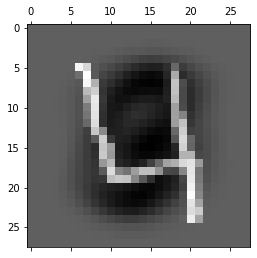

Lable for this image: 4


In [7]:
# Displaying the same image after data is centered
plt.gray()
plt.matshow(X_centered[3,:].reshape((28,28)))
plt.show()
print('Lable for this image:', Y[3])

#### Principal Component Analysis

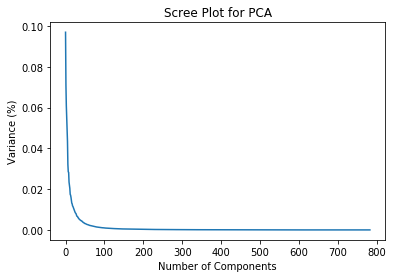

In [8]:
# creating an instance of the PCA() object
pca = skldecomp.PCA().fit(X_centered)
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Scree Plot for PCA')
plt.show()

From the Scree Plot, it can be seen that most of the variance is captured by less than first 100 principal components, i.e $k < 100$.

In [9]:
# creating an instance of the PCA() object that retains 90% information
data_pca = skldecomp.PCA(n_components=0.90, svd_solver='full') 
# using the fit_transform API to simultaneously compute PCA features and directions 
features_X = data_pca.fit_transform(X_centered) 
# printing the value of k, as returned by sklearn 
display(Latex(r'The value of the integer $k$ retaining 90% information is $k$ = {}.'.format(data_pca.n_components_)))

<IPython.core.display.Latex object>

#### Reconstruction of a sample image from Top $k$ Principal components

In [10]:
# Reconstructing the image with k = 85
M = data_pca.components_[0:85,:]
X_tilde = X_centered@M.T
X_hat = mean_datascaler.inverse_transform(X_tilde@M)

<Figure size 432x288 with 0 Axes>

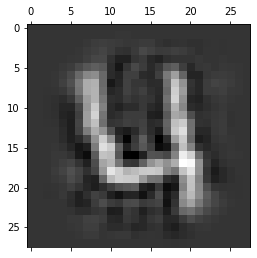

label for this image: 4


In [11]:
plt.gray() 
plt.matshow(X_hat[3,:].reshape((28,28))) 
plt.show()
print('label for this image:', Y[3])

##### Scree Plot for Top $k$ Principal Components

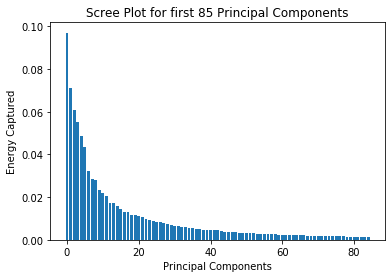

In [12]:
energy_captured = data_pca.explained_variance_ratio_
principal_components = [i for i in range(85)]
plt.bar(principal_components, energy_captured)
plt.title('Scree Plot for first 85 Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Energy Captured')
plt.show()

The chosen value for $k$ is $85$ since it captures 90% variability in the data.

In [13]:
# Modified data sets after Dimensionality Reduction
print('Independent Features:', X_tilde.shape, ', X_tilde Type:', type(X_tilde))
Y = np.array(Y)
print('Corresponding Labels:', Y.shape, ', Y Type:', type(Y))

Independent Features: (5000, 85) , X_tilde Type: <class 'numpy.ndarray'>
Corresponding Labels: (5000,) , Y Type: <class 'numpy.ndarray'>


-----

### **Digit Classification - Naive Bayes' Approach**

In Naive Bayes' approach to classifation, the x components are assumed to be independent from each other. 

#### Dataframe of Principal Components and corresponding Labels 

In [14]:
# Combining PCA features and corresponding Labels in a Single Pandas DataFrame.
df_features = pd.DataFrame(X_tilde, columns=['pca{}'.format(i+1) for i in range(85)])
df_labels = pd.DataFrame(Y, columns=['label'])
df = pd.concat([df_features, df_labels], axis=1)

In [15]:
# Summarizing Dataframe
print(df.shape)
print(df.axes)
print(df.dtypes)

(5000, 86)
[RangeIndex(start=0, stop=5000, step=1), Index(['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9',
       'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17',
       'pca18', 'pca19', 'pca20', 'pca21', 'pca22', 'pca23', 'pca24', 'pca25',
       'pca26', 'pca27', 'pca28', 'pca29', 'pca30', 'pca31', 'pca32', 'pca33',
       'pca34', 'pca35', 'pca36', 'pca37', 'pca38', 'pca39', 'pca40', 'pca41',
       'pca42', 'pca43', 'pca44', 'pca45', 'pca46', 'pca47', 'pca48', 'pca49',
       'pca50', 'pca51', 'pca52', 'pca53', 'pca54', 'pca55', 'pca56', 'pca57',
       'pca58', 'pca59', 'pca60', 'pca61', 'pca62', 'pca63', 'pca64', 'pca65',
       'pca66', 'pca67', 'pca68', 'pca69', 'pca70', 'pca71', 'pca72', 'pca73',
       'pca74', 'pca75', 'pca76', 'pca77', 'pca78', 'pca79', 'pca80', 'pca81',
       'pca82', 'pca83', 'pca84', 'pca85', 'label'],
      dtype='object')]
pca1     float64
pca2     float64
pca3     float64
pca4     float64
pca5     float

#### Random Partition of Dataframe into 70:30 ratio as Training and Test Datasets

In [16]:
from sklearn import model_selection as ms
training_data, test_data = ms.train_test_split(df, test_size=0.3)
print('Dimensions of Training Data: ', training_data.shape)
print('Dimensions of Test Data: ', test_data.shape)

Dimensions of Training Data:  (3500, 86)
Dimensions of Test Data:  (1500, 86)


Let n be the number of samples in Training data and m be the number of samples in Test data.

In [17]:
n = 3500
m = 1500

#### Splitting Training Data w.r.t. Class Labels 

In [18]:
df_label = [None]*10
for i in range(10):
    df_label[i] = training_data['label'] == i

In [19]:
# Summary of Training Dataset w.r.t classes 0,1,2,...,9
for i in range(10):
    print('Label:', i, '- Dimensions in Training Data:', training_data[df_label[i]].shape)

Label: 0 - Dimensions in Training Data: (350, 86)
Label: 1 - Dimensions in Training Data: (397, 86)
Label: 2 - Dimensions in Training Data: (381, 86)
Label: 3 - Dimensions in Training Data: (347, 86)
Label: 4 - Dimensions in Training Data: (343, 86)
Label: 5 - Dimensions in Training Data: (337, 86)
Label: 6 - Dimensions in Training Data: (331, 86)
Label: 7 - Dimensions in Training Data: (347, 86)
Label: 8 - Dimensions in Training Data: (339, 86)
Label: 9 - Dimensions in Training Data: (328, 86)


#### Prior Probabilities

In [20]:
# Computing Prior Probabilities of each class 0,1,2,...,9
prior = [None]*10
for i in range(10):
    prior[i] = len(training_data[df_label[i]])/n
    print('Prior['+str(i)+'] =', round(prior[i], 3))

Prior[0] = 0.1
Prior[1] = 0.113
Prior[2] = 0.109
Prior[3] = 0.099
Prior[4] = 0.098
Prior[5] = 0.096
Prior[6] = 0.095
Prior[7] = 0.099
Prior[8] = 0.097
Prior[9] = 0.094


#### Mean Vector and Covariance Matrix of each class

In [21]:
# Computing Mean Vectors for each class 0,1,2,...,9
mean_vector = [None]*10
for i in range(10):
    class_i_samples = training_data[df_label[i]]
    mean_vector[i] = np.array(class_i_samples.loc[:,'pca1':'pca85'].mean())

print('Mean Vector of class 0 Dimensions and type:', mean_vector[0].shape, type(mean_vector[0]))

Mean Vector of class 0 Dimensions and type: (85,) <class 'numpy.ndarray'>


In [22]:
# Computing Covariance Matrix for each class 0,1,2,...,9
covariance_matrix = [None]*10
for i in range(10):
    class_i_samples = training_data[df_label[i]]
    variance = class_i_samples.loc[:,'pca1':'pca85'].var()
    covariance_matrix[i] = np.diag(variance)
    
print('Covariance Matrix of class 0 Dimensions and type:', covariance_matrix[0].shape, type(covariance_matrix[0]))
print(covariance_matrix[0])

Covariance Matrix of class 0 Dimensions and type: (85, 85) <class 'numpy.ndarray'>
[[221050.67925648      0.              0.         ...      0.
       0.              0.        ]
 [     0.          54882.45743533      0.         ...      0.
       0.              0.        ]
 [     0.              0.         214737.50671291 ...      0.
       0.              0.        ]
 ...
 [     0.              0.              0.         ...   3600.72268984
       0.              0.        ]
 [     0.              0.              0.         ...      0.
    3816.58814422      0.        ]
 [     0.              0.              0.         ...      0.
       0.           5199.44048195]]


#### Likelihood Function of each class

The Likelihood function of each class is assumed to be a Multivariate Gaussian Distribution.   

In [23]:
# Computing multivariate normal distribution for each class 0,1,2,...,9
from scipy.stats import multivariate_normal as mvn
likelihood = [None]*10
for i in range(10):
    likelihood[i] = mvn(mean=mean_vector[i], cov=covariance_matrix[i])

#### Prediction of Label on a Test Sample

<Figure size 432x288 with 0 Axes>

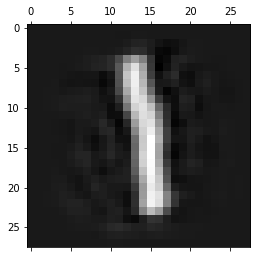

Label for this sample image: 1


In [24]:
# First Image in the test data
sample_image = test_data.iloc[0]
sample_image_label = int(sample_image.loc['label'])
sample_image_features = np.array(sample_image.loc['pca1':'pca85'])
sample_image = mean_datascaler.inverse_transform(sample_image_features@M)
plt.gray()
plt.matshow(sample_image.reshape((28,28)))
plt.show()
print('Label for this sample image:', sample_image_label)

In [25]:
# Based on the Image Features, computing the Probabilities that it belongs to a respective class
max_prob = 0
for i in range(10):
    prob = likelihood[i].pdf(sample_image_features)*prior[i]
    print('Probability[sample image is {}] = {}'.format(i, prob))
    if prob > max_prob:
        max_prob = prob
        arg_max = i  
display(Latex('\nBased on computed Probabilities, the digit is predicted to be $Y = {}$.'.format(arg_max)))

Probability[sample image is 0] = 2.3680241784477974e-233
Probability[sample image is 1] = 5.290754722108544e-224
Probability[sample image is 2] = 1.993763865750836e-232
Probability[sample image is 3] = 2.4067397823859276e-231
Probability[sample image is 4] = 8.576392567873007e-233
Probability[sample image is 5] = 1.1136488497020267e-231
Probability[sample image is 6] = 8.63713186655074e-233
Probability[sample image is 7] = 1.930465522251037e-229
Probability[sample image is 8] = 1.7747634934850236e-233
Probability[sample image is 9] = 1.0970748705348459e-229


<IPython.core.display.Latex object>

The same method can be extended to predict all the other images in the test data.

#### Naive Bayes' Classification of Labels on all the Images in Test Data 

In [26]:
# Testing the approach on the full test data
test_features = np.array(test_data.loc[:, 'pca1':'pca85'])
test_label = np.array(test_data.loc[:,'label'])
print('Dimensions of test data features: ', test_features.shape)
print('Dimensions of test data labels: ', test_label.shape)

Dimensions of test data features:  (1500, 85)
Dimensions of test data labels:  (1500,)


In [27]:
def predict_digit(sample_features):
    global Prior
    global likelihood
    
    max_prob = 0
    arg_max = np.random.randint(0,10)    # randomly assigns a class in case of an unlikely event when a sample has zero prob in all classes 
    for i in range(10):
        prob = likelihood[i].pdf(sample_features)*prior[i]
        if prob > max_prob:
            max_prob = prob
            arg_max = i 
    return arg_max

predict_digit(sample_image_features)

1

In [28]:
bayes_prediction = np.empty(m, int)
for i in range(m):
    bayes_prediction[i] = predict_digit(test_features[i])

In [29]:
# Comparing the First 15 classification results
print('True Labels: {}'.format(test_label[:15]))
print('Predictions: {}'.format(bayes_prediction[:15]))

True Labels: [1 6 0 5 0 0 2 2 3 1 8 4 3 0 0]
Predictions: [1 6 0 5 0 0 2 2 3 1 8 4 3 0 0]


#### Evaluation of Naive Bayes' Classifier

In [30]:
# Computing number of misclassifications
correct_classification = np.equal(test_label, bayes_prediction)
error_idx = np.argwhere(correct_classification == False)  # array of test_data indexes where incorrect classifications are made 

print('Number of correct classifications:', sum(correct_classification))
print('Number of incorrect classifications:', len(error_idx))

Number of correct classifications: 1303
Number of incorrect classifications: 197


Actual Label: [1]
Output Label: [5]


<Figure size 432x288 with 0 Axes>

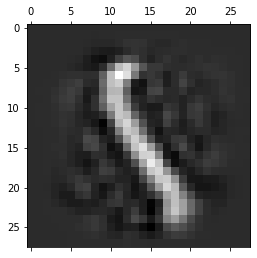


Actual Label: [2]
Output Label: [9]


<Figure size 432x288 with 0 Axes>

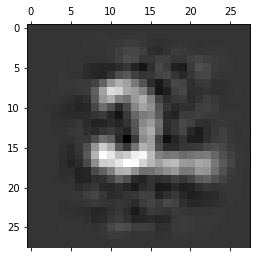


Actual Label: [8]
Output Label: [5]


<Figure size 432x288 with 0 Axes>

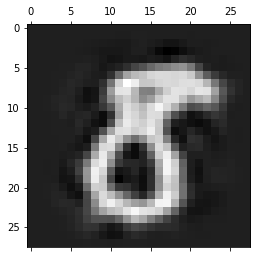

In [31]:
# Examples of incorrect images in 
for i in range(3):
    x = error_idx[i]
    print('Actual Label:', test_label[x])
    print('Output Label:', bayes_prediction[x])
    image = mean_datascaler.inverse_transform(test_features[x]@M)
    plt.gray()
    plt.matshow(image.reshape((28,28)))
    plt.show()
    print('')

In [32]:
# Error rate of the classifier
print('The Error rate on this Naive Bayes classifier is {}%'.format(round(len(error_idx)*100/m, 2)))
print('Digit classifier built using the Naive Bayes approach is', round(sum(correct_classification)*100/m, 1), '% accurate on this dataset.')

The Error rate on this Naive Bayes classifier is 13.13%
Digit classifier built using the Naive Bayes approach is 86.9 % accurate on this dataset.


---

### **Digit Classification - Quadratic Discriminant Analysis**

In Naive Bayes Approach, all the PCA features are considered as independent from each other. As a result, the off diagonal elements in the Covariance Matrix are zeros.  
In Linear Discriminant Analysis, variances of all the features are assumed to be equal, which is not the case here.  
Quadratic Discriminant Analysis is applicable when all features have different variances and it also takes into account the covariances of different features w.r.t each other.   
***To apply QDA on the Digit classification problem, the mean vector of the classes is the same as in the Naive Bayes' classifier but the covariance matrix is recalculated for each class and consequently the likelihood functions are recomputed.***

#### QDA Likelihood functions (Different from Naive Bayes')

In [33]:
for i in range(10):
    class_i_samples = training_data[df_label[i]]
    variance = class_i_samples.loc[:,'pca1':'pca85'].var()
    covariance_matrix[i] = np.diag(variance)

In [34]:
# In QDA, recalculate the covariance matrix and hence the likelihood functions
cov_matrix = [None]*10
for i in range(10):
    class_i_samples = training_data[df_label[i]]
    cov_matrix[i] = class_i_samples.loc[:,'pca1':'pca85'].cov()
    cov_matrix[i] = np.array(cov_matrix[i])
print('Covariance Matrix in QDA of class 0 Dimensions and type:', cov_matrix[0].shape, type(cov_matrix[0]))
print(cov_matrix[0])

Covariance Matrix in QDA of class 0 Dimensions and type: (85, 85) <class 'numpy.ndarray'>
[[ 2.21050679e+05  2.50863906e+04 -8.26444896e+03 ...  1.40891354e+03
  -6.25257741e+02 -1.39314641e+03]
 [ 2.50863906e+04  5.48824574e+04 -4.19802246e+04 ...  5.04984804e+02
   1.05563899e+03 -1.12731176e+03]
 [-8.26444896e+03 -4.19802246e+04  2.14737507e+05 ...  1.77723312e+03
   1.04088412e+03  4.11850331e+03]
 ...
 [ 1.40891354e+03  5.04984804e+02  1.77723312e+03 ...  3.60072269e+03
  -6.50241457e+02 -2.99603854e+02]
 [-6.25257741e+02  1.05563899e+03  1.04088412e+03 ... -6.50241457e+02
   3.81658814e+03  1.52735991e+02]
 [-1.39314641e+03 -1.12731176e+03  4.11850331e+03 ... -2.99603854e+02
   1.52735991e+02  5.19944048e+03]]


In [35]:
# Recalculating multivariate normal distribution for each class 0,1,2,...,9
for i in range(10):
    likelihood[i] = mvn(mean=mean_vector[i], cov=cov_matrix[i])

#### Prediction of Label on a Test Sample

<Figure size 432x288 with 0 Axes>

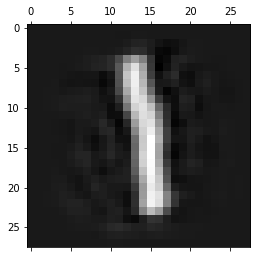

Label for this sample image: 1


In [36]:
# First Image in the test data
plt.gray()
plt.matshow(sample_image.reshape((28,28)))
plt.show()
print('Label for this sample image:', sample_image_label)

In [37]:
# Based on the Image Features and the new likelood functions, computing the Probabilities that it belongs to a respective class
max_prob = 0
for i in range(10):
    prob = likelihood[i].pdf(sample_image_features)*prior[i]
    print('Probability[sample image is {}] = {}'.format(i, prob))
    if prob > max_prob:
        max_prob = prob
        arg_max = i  
display(Latex('\nBased on computed Probabilities, the digit is predicted to be $Y = {}$.'.format(arg_max)))

Probability[sample image is 0] = 0.0
Probability[sample image is 1] = 7.094334954432978e-178
Probability[sample image is 2] = 5.38831208805975e-261
Probability[sample image is 3] = 6.247938459317428e-275
Probability[sample image is 4] = 4.9398723090722296e-266
Probability[sample image is 5] = 4.2045248958671475e-276
Probability[sample image is 6] = 0.0
Probability[sample image is 7] = 0.0
Probability[sample image is 8] = 1.0624722903399792e-243
Probability[sample image is 9] = 0.0


<IPython.core.display.Latex object>

In [38]:
# Making the above prediction using the predict_digit function
predict_digit(sample_image_features)

1

#### QDA Classification of Labels on all the Images in Test Data 

In [39]:
# Testing the approach on the full test data
print('Dimensions of test data features: ', test_features.shape)
print('Dimensions of test data labels: ', test_label.shape)

Dimensions of test data features:  (1500, 85)
Dimensions of test data labels:  (1500,)


In [40]:
qda_prediction = np.empty(m, int)
for i in range(m):
    qda_prediction[i] = predict_digit(test_features[i])

In [41]:
# Comparing the First 15 classification results
print('True Labels: {}'.format(test_label[:15]))
print('Predictions: {}'.format(qda_prediction[:15]))

True Labels: [1 6 0 5 0 0 2 2 3 1 8 4 3 0 0]
Predictions: [1 6 0 5 0 0 2 2 3 1 8 4 3 0 0]


#### Evaluation of Quadratic Discriminant Analysis

In [42]:
# Computing number of misclassifications
correct_classification = np.equal(test_label, qda_prediction)
error_idx = np.argwhere(correct_classification == False)  # array of test_data indexes where incorrect classifications are made 

print('Number of correct classifications:', sum(correct_classification))
print('Number of incorrect classifications:', len(error_idx))

Number of correct classifications: 1405
Number of incorrect classifications: 95


Actual Label: [1]
Output Label: [8]


<Figure size 432x288 with 0 Axes>

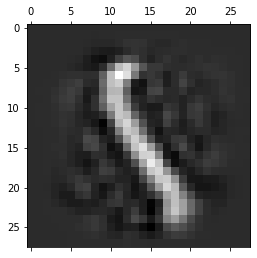


Actual Label: [1]
Output Label: [8]


<Figure size 432x288 with 0 Axes>

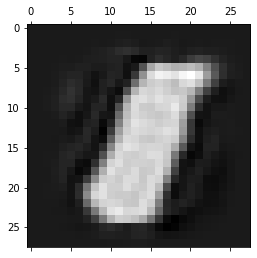


Actual Label: [3]
Output Label: [8]


<Figure size 432x288 with 0 Axes>

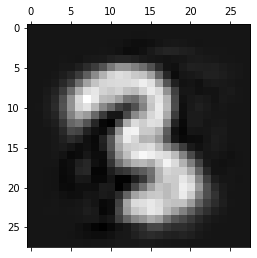

In [43]:
# Examples of incorrect images in QDA classifier
for i in range(3):
    x = error_idx[i]
    print('Actual Label:', test_label[x])
    print('Output Label:', qda_prediction[x])
    image = mean_datascaler.inverse_transform(test_features[x]@M)
    plt.gray()
    plt.matshow(image.reshape((28,28)))
    plt.show()
    print('')

In [44]:
# Error rate of the classifier
print('The Error rate on this QDA classifier is {}%'.format(round(len(error_idx)*100/m, 2)))
print('Digit classifier built using Quadratic Discriminant Analysis is {}% accurate on this dataset.'.\
      format(round(sum(correct_classification)*100/m, 1)))

The Error rate on this QDA classifier is 6.33%
Digit classifier built using Quadratic Discriminant Analysis is 93.7% accurate on this dataset.


---

***Naive Bayes' approach vs QDA on Digit Classification problem***  
On this dataset, QDA was found to be more accurate at classifying handwritten digits than the Naive Bayes' approach to classification.